## Прикладная статистика в машинном обучении

### Семинар 8: Тестирование гипотез в линейной модели

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Самое важное!
import statsmodels.formula.api as smf

In [2]:
# В seaborn есть несколько встроенных классических наборов данных
sns.get_dataset_names()

/home/vladimiromelyusik/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file /home/vladimiromelyusik/anaconda3/lib/python3.8/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
# Классический набор данных с информацией об алмазах
data = sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


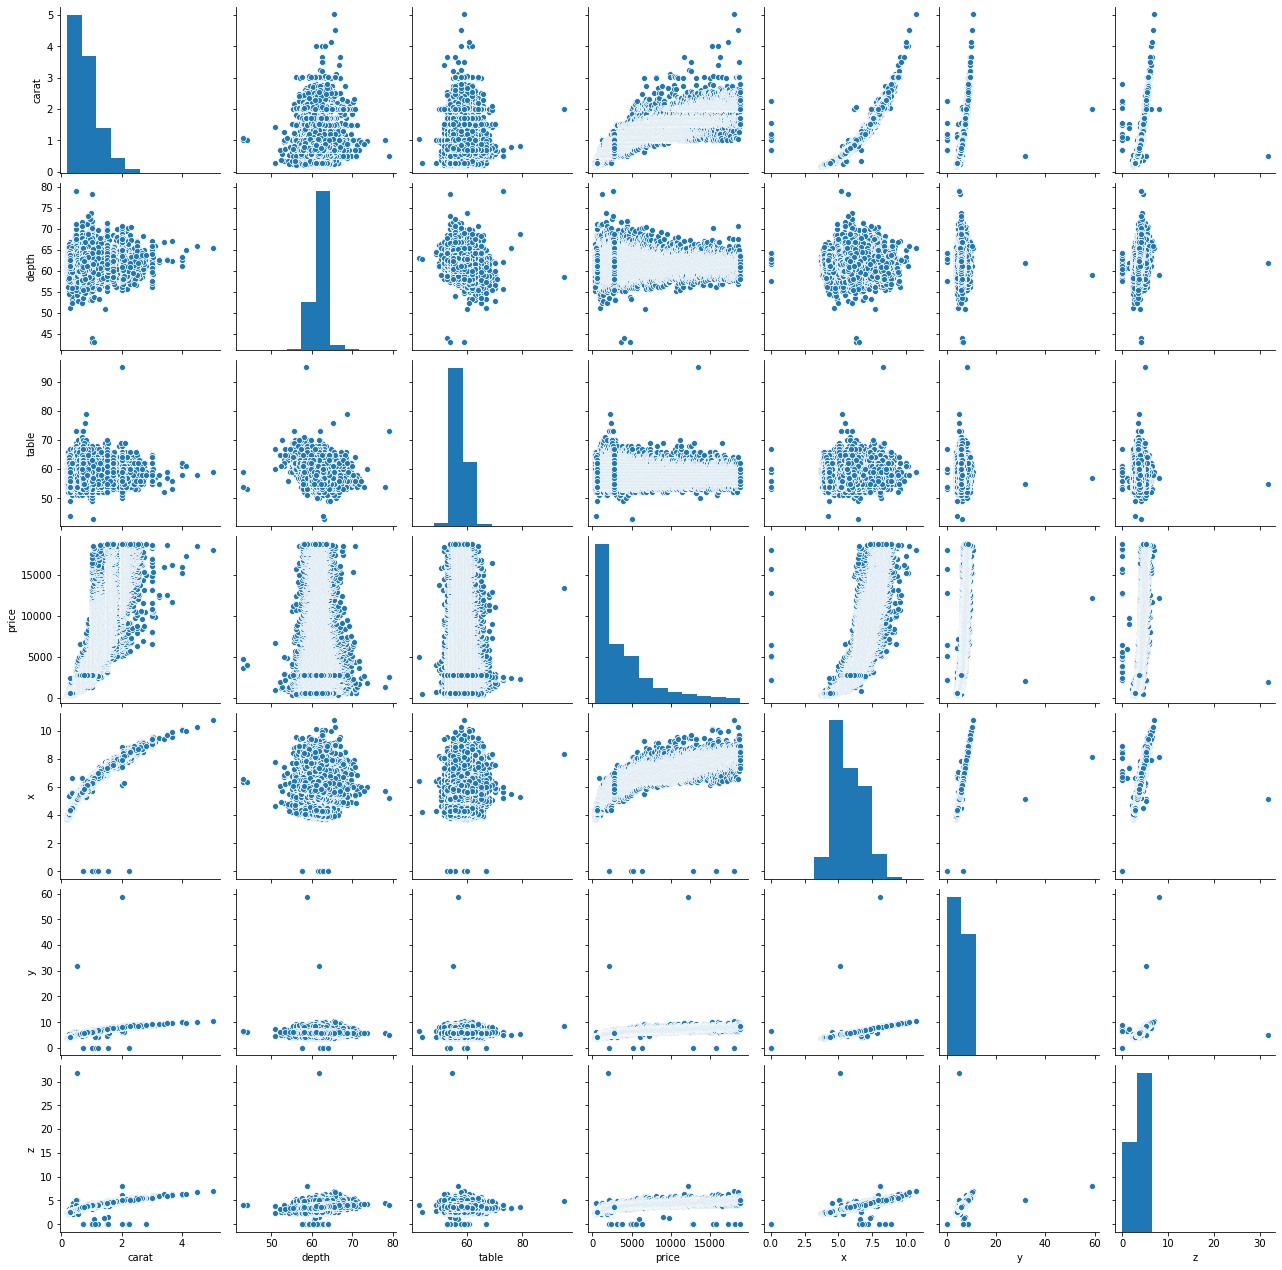

In [4]:
# Построим линейную модель зависимости цены (price) от каких-нибудь показателей
# По графикам видно, что уместо взять логарифм цены в качестве зависимой переменной
sns.pairplot(data)

In [4]:
# Формулу регрессии прописываем в human-readable формате
model = smf.ols(data = data, formula = 'np.log(price) ~ x + y + z + depth + table + cut').fit()
# Statmodels сам создаст дамми-переменные для категориальной переменной cut

In [5]:
# Результаты оценки модели
model.summary()
# Что важно:
# Показываются оценки коэффициентов, стандартные отклонения, t-статистики для тестирования на значимость
# Показывается R-квадрат и другие показатели для оценки качества, о которых будем говорить позже
# Показывается F-статистика для тестирования регрессии на значимость в целом

# Показываются и другие полезные вещи, например, автоматически проводятся некоторые статистические тесты

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 6.998e+04
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:23:16   Log-Likelihood:                -8819.9
No. Observations:               53940   AIC:                         1.766e+04
Df Residuals:                   53930   BIC:                         1.775e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.9208      0.096      9.638      0.000       0.734       1.108
cut[T.Good]          0.1496      0.008     17.813      0.000       0.133       0.166
cut[T.Ideal]         0.2636      0.008     31.648      0.000       0.247       0.280
cut[T.Premium]       0.1701      0.008     21.151      0.000       0.154       0.186
cut[T.Very Good]     0.2073      0.008     25.802      0.000       0.192       0.223
x                    0.8098      0.007    120.766      0.000       0.797       0.823
y                    0.0299      0.005      6.133      0.000       0.020       0.039
z                    0.0576      0.008      6.823      0.000       0.041       0.074
depth                0.0231      0.001     20.691      0.000       0.021       0.025
table                0.0038      0.001      5.139      0.000       0.002       0.005
==============================================================================
Omnibus:                    25671.348   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2450855.360
Skew:                           1.366   Prob(JB):                         0.00
Kurtosis:                      35.909   Cond. No.                     6.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
# Гипотезы тоже указываем в human-readable формате, перечисляя ограничения через запятую
# Для указания коэффициентов вводим названия соответствующих переменных
H0 = 'cut[T.Premium]=cut[T.Very Good], z=0'
model.f_test(H0)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[79.03371055]]), p=5.324744660103704e-35, df_denom=5.39e+04, df_num=2>

In [7]:
H0 = 'depth=z'
model.f_test(H0)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[14.75667344]]), p=0.00012245374420224655, df_denom=5.39e+04, df_num=1>